In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
df=pd.read_csv(r"censusCrimeClean.csv")
df.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
a=df.medIncome
b=df.ViolentCrimesPerPop

In [5]:
corr_pearson=pearsonr(a,b)
corr_spearman=spearmanr(a,b)

In [6]:
print(round(corr_pearson.statistic,5))
print(round(corr_spearman.statistic,5))

print(corr_pearson.pvalue)
print(corr_spearman.pvalue)

-0.42422
-0.48217
6.334424808043511e-88
1.2978853095169542e-116


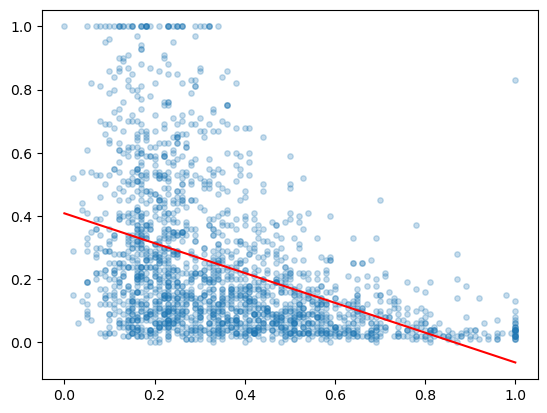

In [7]:
plt.scatter(a,b,alpha=0.25,s=15)
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, b, 1))
         (np.unique(a)), color='red')

plt.show()

# 2nd

In [8]:
df2=pd.read_csv('heart.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df2.sex=df2.sex.map({0:'female',1:'male'})

In [10]:
l=list(df2.columns)
l[-1]='hasHeartDisease' 

In [11]:
l[-1]

'hasHeartDisease'

In [12]:
df2.columns=l

In [13]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hasHeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df2.groupby(by='hasHeartDisease').describe().trestbps

,count,mean,std,min,25%,50%,75%,max
hasHeartDisease,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,165.0,129.303030,16.169613,94.0,120.0,130.0,140.00,180.0


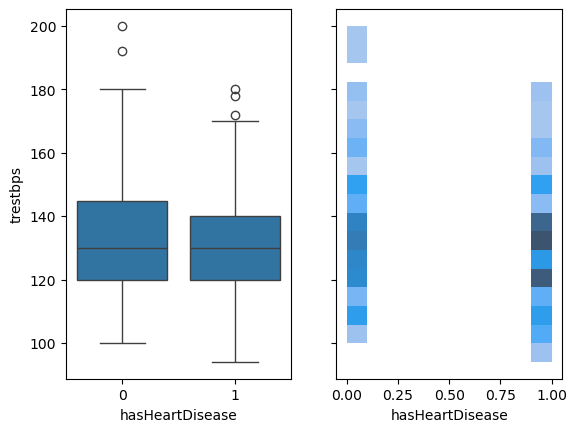

In [34]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=df2,y='trestbps',x='hasHeartDisease',ax=axes[0])
sns.histplot(data=df2,y='trestbps',x='hasHeartDisease',ax=axes[1])
plt.show()

In [27]:
from scipy.stats import ttest_ind

In [32]:
ttest_ind(df2.trestbps[df2.hasHeartDisease ==0],df2.trestbps[df2.hasHeartDisease ==1])

TtestResult(statistic=2.5412927171039, pvalue=0.011546059200233312, df=301.0)

Ho= means are same.<br>
Answer: pvalue=0.011 -> No, mean is not same for these groups

In [ ]:
from statistics import mean, stdev
from math import sqrt

c0=df2.trestbps[df2.hasHeartDisease ==0]
c1=df2.trestbps[df2.hasHeartDisease ==1]



cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)

0.2912279474028835


d=0.3
Answer: Effect size is small
<br>
difference between the groups is real and not random chance, but it is a small difference in practical terms.

In [51]:
#Count the number with the disease for each gender type
hasDiseaseCount=df2[df2.hasHeartDisease==0].groupby("sex").count().hasHeartDisease

#Count the number of gender type
totalCount=df2.groupby("sex").count()['hasHeartDisease']

# #combine into a dataframe (both are indexed with gender, so will be matched) and specify the columns
p=pd.concat([hasDiseaseCount, totalCount], axis=1)
p.columns = ["hasDiseaseCount", "totalCount"]

# #create a new column and calculate the proportion
p['propHeartDisease']=p["hasDiseaseCount"]/p["totalCount"]

#print the results
print(p.head())

        hasDiseaseCount  totalCount  propHeartDisease
sex                                                  
female               24          96          0.250000
male                114         207          0.550725


In [65]:
p_male = 114/207  #male population proportion
n_m = 207        

p_fe=24/96
n_f=96
p_fe     #total male population

0.25

In [62]:
se_male = np.sqrt(p_male * (1 - p_male) / n_m)
se_male

0.0345731047302169

In [63]:
se_female = np.sqrt(p_fe * (1 - p_fe) / n_f)
se_female

0.04419417382415922

In [64]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.05611082400648334

In [66]:
d = 0.55 - 0.25
lcb = d - 1.96 * se_diff  #lower limit of the CI
ucb = d + 1.96 * se_diff  #upper limit of the CI

In [67]:
lcb

0.1900227849472927

In [68]:
ucb

0.4099772150527074

### This range does not have 0 in it. Both the numbers are above zero. So, We cannot make any conclusion that the population proportion of females with heart disease is the same as the population proportion of males with heart disease.